In [2]:
pip install opencv-python numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [30]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [31]:
def load_images_and_labels(image_dir):
    images = []
    labels = []
    
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            label = filename.split('_')[1].split('.')[0]# Extract the label from the filename
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append(image)
                labels.append(label)
    
    print(f'Loaded {len(images)} images from {image_dir}')
    return images, labels

data_dir = 'C:/Users/kalpa/Desktop/Face recognisaton'
images, labels = load_images_and_labels(data_dir)


Loaded 410 images from C:/Users/kalpa/Desktop/Face recognisaton


In [32]:
def preprocess_data(images, labels, image_size=(100, 100)):
    resized_images = [cv2.resize(image, image_size) for image in images]
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    return np.array(resized_images), encoded_labels, label_encoder

resized_images, encoded_labels, label_encoder = preprocess_data(images, labels)
print(f'Shape of resized_images: {resized_images.shape}')
print(f'Shape of encoded_labels: {encoded_labels.shape}')

Shape of resized_images: (410, 100, 100)
Shape of encoded_labels: (410,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(resized_images, encoded_labels, test_size=0.3, random_state=42)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (287, 100, 100)
Shape of X_test: (123, 100, 100)
Shape of y_train: (287,)
Shape of y_test: (123,)


In [34]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)  # Add channel dimension
num_classes = len(np.unique(encoded_labels))

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [36]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Number of unique labels
])



In [37]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32,epochs=30,validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/30
9/9 [==============================] - 7s 595ms/step - loss: 3.7169 - accuracy: 0.0209 - val_loss: 3.7298 - val_accuracy: 0.0244
Epoch 2/30
9/9 [==============================] - 5s 540ms/step - loss: 3.6919 - accuracy: 0.0348 - val_loss: 3.7390 - val_accuracy: 0.0244
Epoch 3/30
9/9 [==============================] - 5s 572ms/step - loss: 3.6787 - accuracy: 0.0523 - val_loss: 3.7467 - val_accuracy: 0.0244
Epoch 4/30
9/9 [==============================] - 4s 453ms/step - loss: 3.6619 - accuracy: 0.0418 - val_loss: 3.7465 - val_accuracy: 0.0081
Epoch 5/30
9/9 [==============================] - 4s 502ms/step - loss: 3.6378 - accuracy: 0.0523 - val_loss: 3.7405 - val_accuracy: 0.0407
Epoch 6/30
9/9 [==============================] - 5s 521ms/step - loss: 3.6056 - accuracy: 0.0767 - val_loss: 3.7371 - val_accuracy: 0.0488
Epoch 7/30
9/9 [==============================] - 5s 618ms/step - loss: 3.5656 - accuracy: 0.1080 - val_loss: 3.7093 - val_accuracy: 0.0488
Epoch 8/30
9/9 [====

In [38]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 85ms/step - loss: 0.8163 - accuracy: 0.8293
Test Accuracy: 0.8292682766914368


4/4 - 0s - loss: 0.8163 - accuracy: 0.8293 - 415ms/epoch - 104ms/step


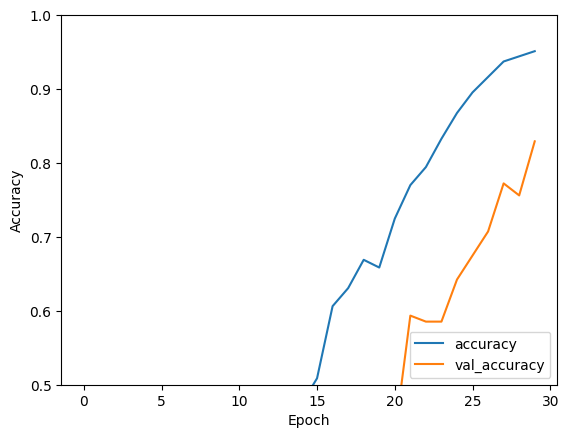

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [40]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Test Accuracy:", train_accuracy)

9/9 [==============================] - 1s 156ms/step - loss: 0.2157 - accuracy: 0.9686
Test Accuracy: 0.9686411023139954


9/9 - 1s - loss: 0.2157 - accuracy: 0.9686 - 641ms/epoch - 71ms/step


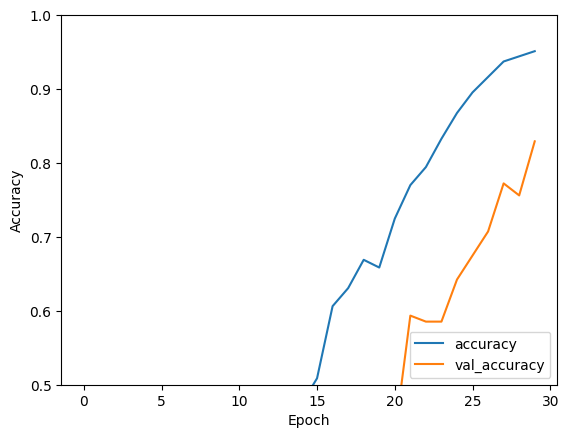

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_train,  y_train, verbose=2)

In [42]:
def preprocess_single_image(image_path, image_size=(100, 100)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or could not be read")
    image = cv2.resize(image, image_size)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image
test_image_path = 'C:/Users/kalpa/Desktop/flower_photos/daisy/5673551_01d1ea993e_n.jpg'#8th image
test_image = preprocess_single_image(test_image_path)
predicted_class = model.predict(test_image)
predicted_label = label_encoder.inverse_transform([np.argmax(predicted_class)])
print("Predicted Label:", predicted_label)

1/1 [==============================] - 0s 221ms/step
Predicted Label: ['1']
